# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 3 of Set 1 | kavaratti
Processing Record 4 of Set 1 | utrik
Processing Record 5 of Set 1 | rio grande
Processing Record 6 of Set 1 | kuanda
Processing Record 7 of Set 1 | cabedelo
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | mulayjah
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | afaahiti
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | campbellton
Processing Record 17 of Set 1 | walvis bay
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | p

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,23.97,74,54,6.07,US,1738801052
1,kavaratti,10.5669,72.6420,26.94,73,13,4.12,IN,1738801055
2,utrik,11.2278,169.8474,26.34,82,87,8.73,MH,1738801056
3,rio grande,-32.0350,-52.0986,25.25,92,20,8.20,BR,1738801057
4,kuanda,56.3161,116.0806,-37.49,89,31,1.36,RU,1738801058


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,23.97,74,54,6.07,US,1738801052
1,kavaratti,10.5669,72.6420,26.94,73,13,4.12,IN,1738801055
2,utrik,11.2278,169.8474,26.34,82,87,8.73,MH,1738801056
3,rio grande,-32.0350,-52.0986,25.25,92,20,8.20,BR,1738801057
4,kuanda,56.3161,116.0806,-37.49,89,31,1.36,RU,1738801058


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

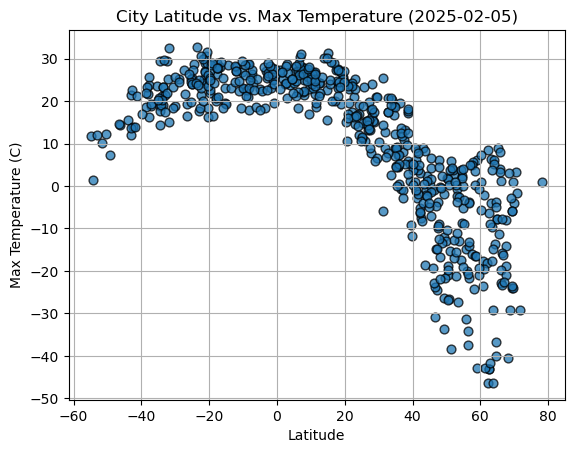

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], s=40, edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({datetime.today().strftime('%Y-%m-%d')})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

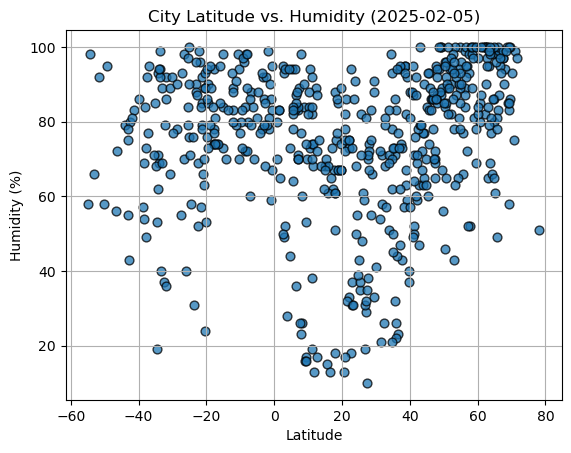

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], s=40, edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({datetime.today().strftime('%Y-%m-%d')})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

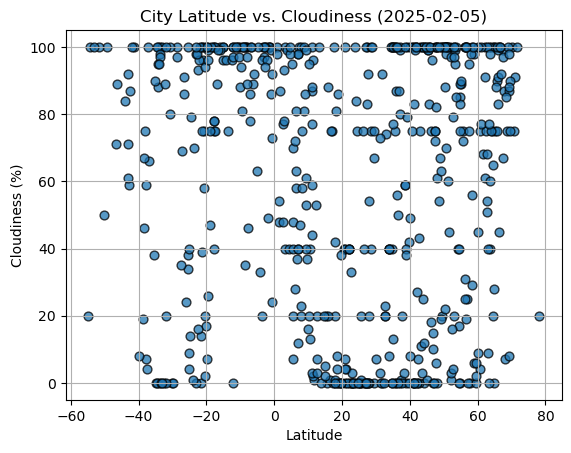

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], s=40, edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({datetime.today().strftime('%Y-%m-%d')})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

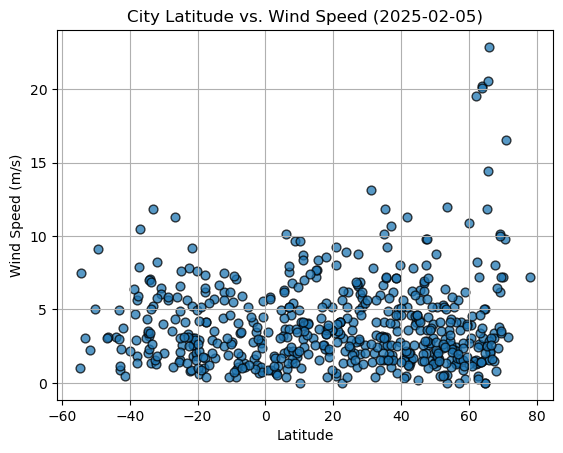

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], s=40, edgecolors="black", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({datetime.today().strftime('%Y-%m-%d')})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r^2-value is: {rvalue**2}")
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values, s=40)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(
        line_eq, xy=(20, 20), xycoords="axes points", fontsize=15, color="red"
    )

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,23.97,74,54,6.07,US,1738801052
1,kavaratti,10.5669,72.6420,26.94,73,13,4.12,IN,1738801055
2,utrik,11.2278,169.8474,26.34,82,87,8.73,MH,1738801056
4,kuanda,56.3161,116.0806,-37.49,89,31,1.36,RU,1738801058
6,bethel,41.3712,-73.4140,-2.83,52,0,0.45,US,1738801060


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,rio grande,-32.0350,-52.0986,25.25,92,20,8.20,BR,1738801057
5,cabedelo,-6.9811,-34.8339,24.37,88,100,5.89,BR,1738800935
8,adamstown,-25.0660,-130.1015,25.43,76,4,6.59,PN,1738801064
9,waitangi,-43.9535,-176.5597,15.46,79,84,3.13,NZ,1738801065
10,edinburgh of the seven seas,-37.0676,-12.3116,18.92,95,66,10.45,SH,1738801066


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6764032130936052


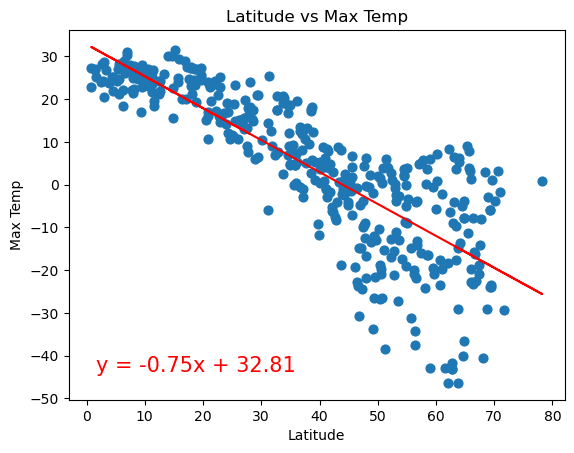

In [15]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

plt.show()

The r^2-value is: 0.28726842000446307


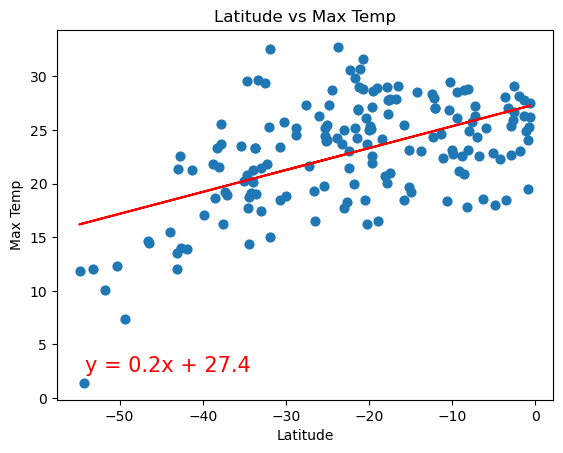

In [16]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

plt.show()

**Discussion about the linear relationship:**
</br>We can see a strong negative relationship between latitude and max temperature in Northern Hemisphere and a weak positive relationship in Southern Hemisphere.
</br>That means that the closer we are to the equator, the greater max temperature is.
</br>The R-squared value of 0.676 for Northern Hemisphere indicates this is a reliable trend.
</br>However, the R-squared value of 0.287 for Souther Hemisphere suggests other factors might influence this relationship (ocean currents, land masses, etc.).

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.16836978431624416


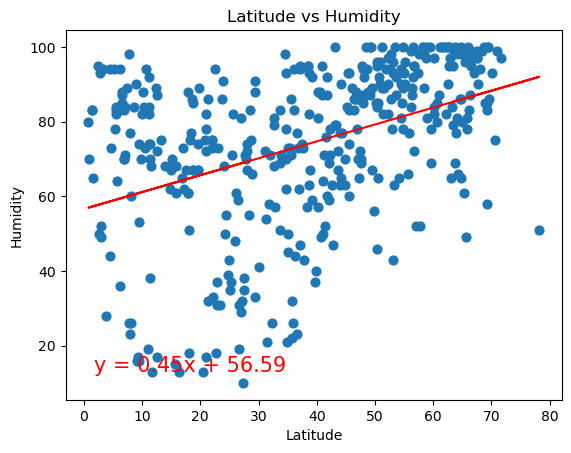

In [17]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

plt.show()

The r^2-value is: 0.057025043387144474


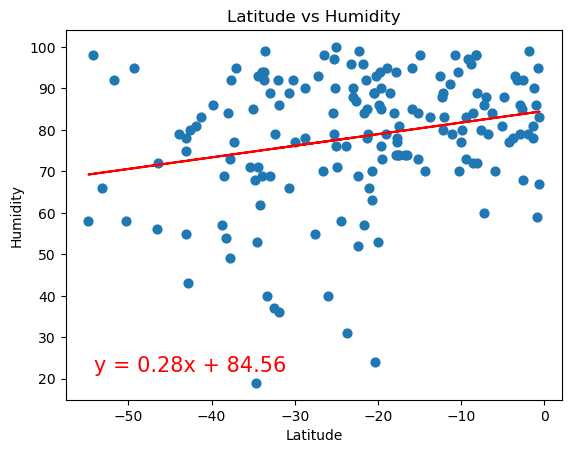

In [18]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

plt.show()

**Discussion about the linear relationship:**
</br> Both for Northern and Southern Hemispheres, we can see that there's a weak positive relationship between latitude and humidity.
</br> That means that, generally, when you move north, humidity increases.
</br> However, the low R-squarede value suggests that many other factors affect humidity more than latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.04669029749008383


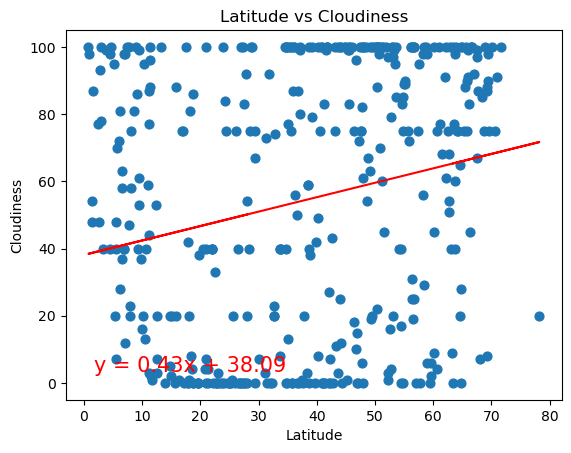

In [19]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

plt.show()

The r^2-value is: 0.05384071097851862


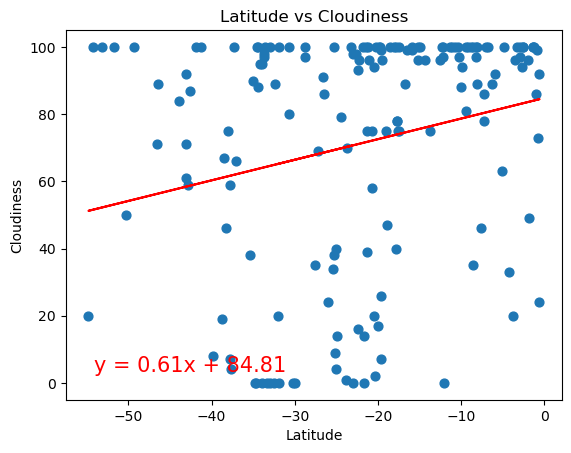

In [20]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

plt.show()

**Discussion about the linear relationship:**
</br> There's a very weak positive relationship between latitude and cloudiness both in Northern and Southern Hemispheres.
</br> As you move north, cloudiness increases slightly.
</br> The R-squared values of 0.047 and 0.054 indicate that this relationship is not strong, meaning other factors have a larger impact on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.006157468611962181


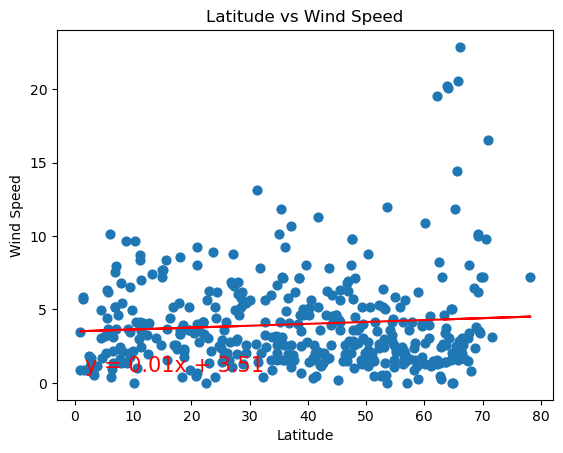

In [21]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

plt.show()

The r^2-value is: 0.03822139789646486


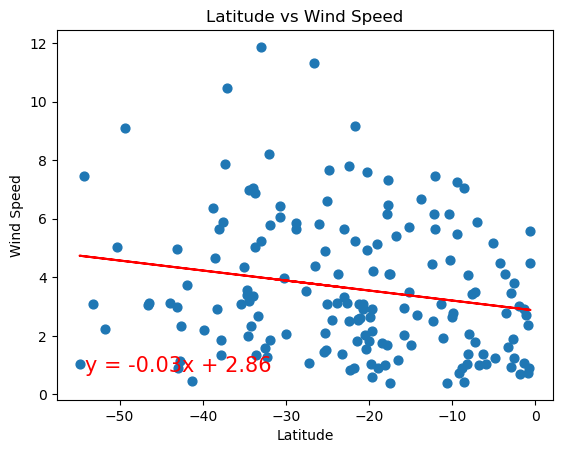

In [22]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

plt.show()

**Discussion about the linear relationship:**
</br> There’s an extremely weak negative relationship between latitude and wind speed in the Northern Hemisphere.
</br> As you move north, wind speed decreases slightly.
</br> However, the R-squared value of 0.006 indicates that this relationship is almost negligible, meaning latitude hardly explains the variation in wind speed.
</br>
</br> There’s a slightly stronger but still weak negative relationship between latitude and wind speed in the Southern Hemisphere.
</br> We can see that wind speed decreases slightly as we move south.
</br> The R-squared value of 0.038 suggests that other factors significantly influence wind speed beyond just latitude.